In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go

import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from imblearn.over_sampling import SMOTE



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
sns.set_context('paper',font_scale=2)

def set_seed(seed=31415):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [ ]:
!pip install plotly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
s_data = pd.read_csv('/content/drive/MyDrive/collab_files/train_2v.csv')
s_data.head(3)

id  gender   age  ...   bmi  smoking_status stroke
0  30669    Male   3.0  ...  18.0             NaN      0
1  30468    Male  58.0  ...  39.2    never smoked      0
2  16523  Female   8.0  ...  17.6             NaN      0

[3 rows x 12 columns]

In [ ]:
###################### data preprocessing

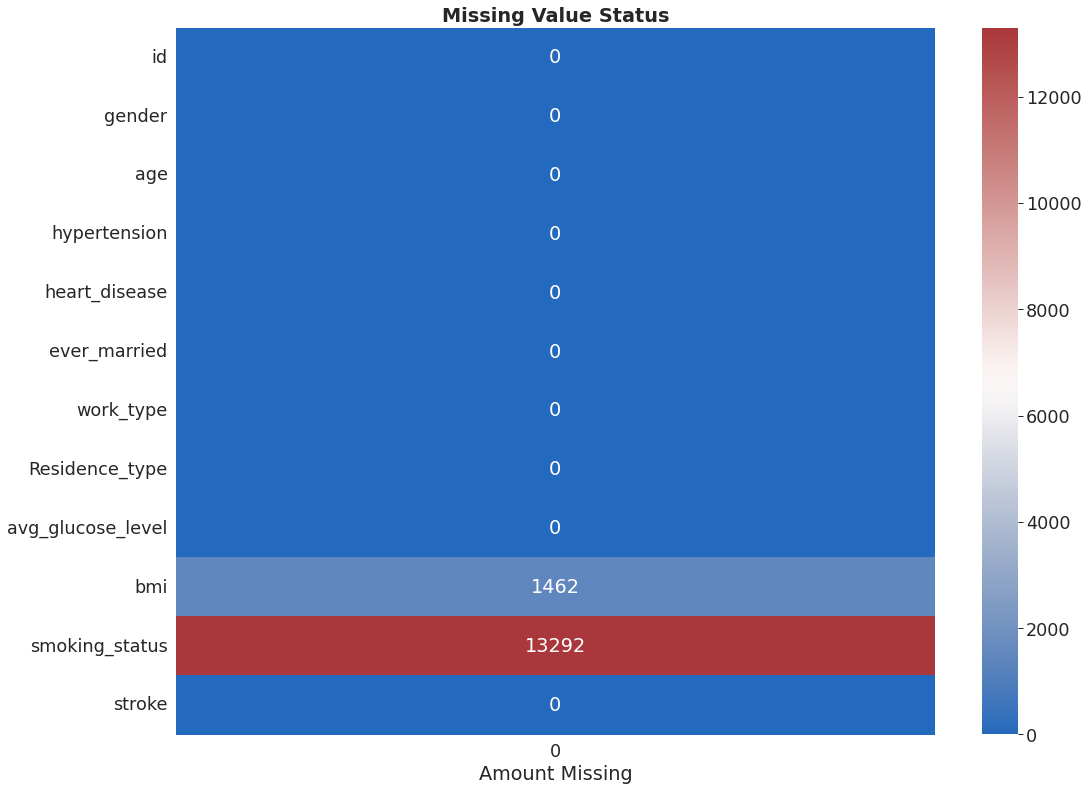

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(s_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [ ]:
fig = ex.pie(s_data,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples<b>')
fig.show(renderer="colab")

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,
          ]
)

fig.add_trace(
    go.Pie(values=s_data.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=s_data.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=s_data.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence<b>",
)

fig.show(renderer="colab")

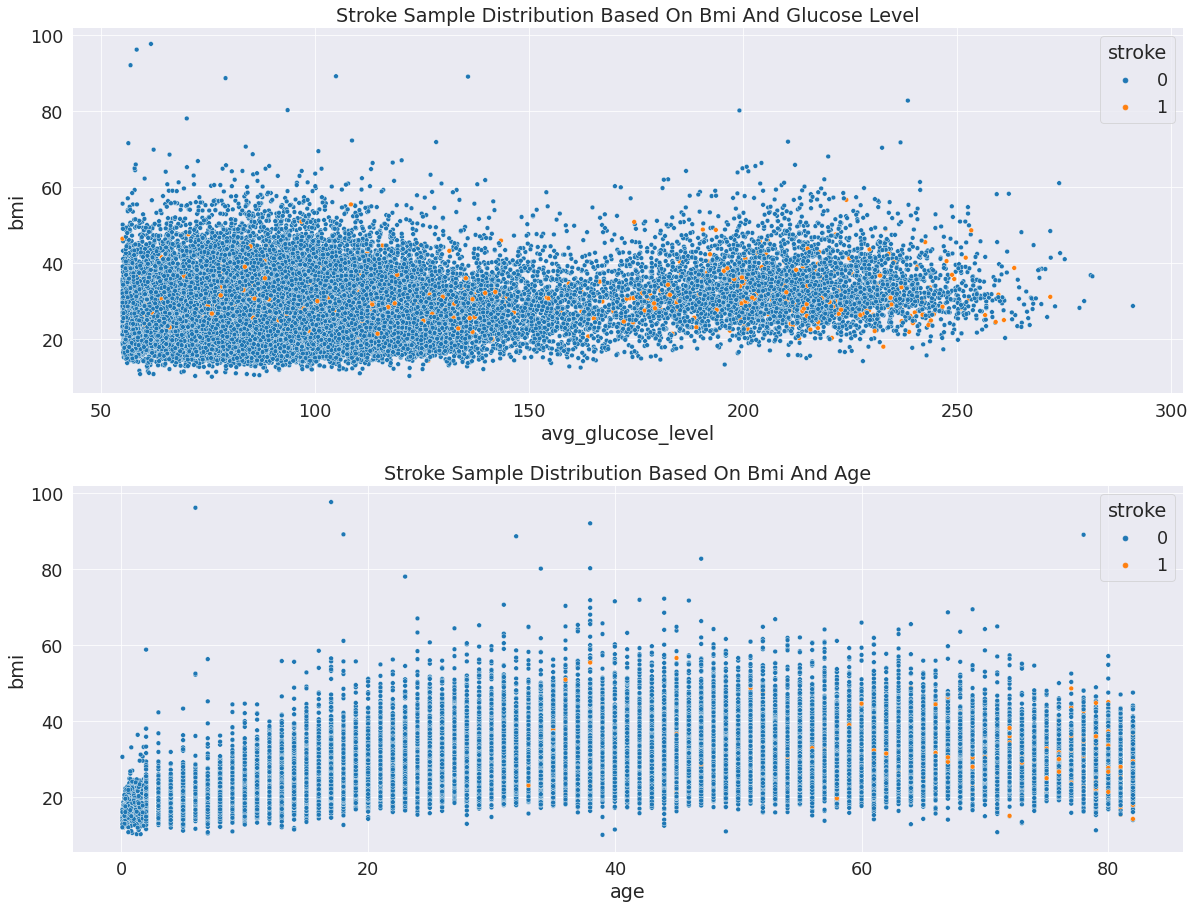

In [ ]:

plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=s_data['avg_glucose_level'],y=s_data['bmi'],hue=s_data['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=s_data['age'],y=s_data['bmi'],hue=s_data['stroke'])
plt.tight_layout()
plt.show()

In [ ]:
stroke_population = s_data.query('stroke ==1').copy()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,
          ]
)

fig.add_trace(
    go.Pie(values=stroke_population.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=stroke_population.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=stroke_population.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence Of Stroke Positive Samples<b>",
)

fig.show(renderer="colab")

In [ ]:
stroke_population = s_data.query('stroke ==1').copy()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('<b>Proportion Of Different Work Types<b>','<b>Proportion Of Married Individuals<b>','<b>Proportion Of Residence Type<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,
          ]
)

fig.add_trace(
    go.Pie(values=stroke_population.work_type.value_counts().values,labels=['<b>Private<b>','<b>Self-employed<b>','<b>Govt_job<b>','<b>children<b>','<b>Never_worked<b>'],hole=0.3,pull=[0,0.08,0.03,0.2],marker_colors=['orange','green','blue','brown','purple'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=stroke_population.ever_married.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],hole=0.3,pull=[0,0.08],marker_colors=['wheat','black'],textposition='inside'),
    row=1, col=2
)
fig.add_trace(
    go.Pie(values=stroke_population.Residence_type.value_counts().values,labels=['<b>Urban<b>','<b>Rural<b>'],hole=0.3,pull=[0,0.08],marker_colors=['pink','gray'],textposition='inside'),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Different Categorical Attributes Of Stroke Samples<b>",
)

fig.show(renderer="colab")

In [ ]:
fig = ex.pie(stroke_population,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Different Smoking Categories Among Stroke Population<b>')
fig.show(renderer='colab')

In [ ]:
s_data.gender = s_data.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
s_data.Residence_type = s_data.Residence_type.replace({'Rural':0,'Urban':1}).astype(np.uint8)
s_data.work_type = s_data.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [ ]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =s_data.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =s_data.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Locations That Contribute The Most To Our Cut-Offs")
fig.show(renderer="colab")

In [ ]:
####### unsampling the dataset

oversample = SMOTE()
eval_df = s_data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(s_data.shape[0]*0.2),random_state=42)
train_df = s_data.drop(index=eval_df.index)

X_eval,y_eval = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
X,y = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X, y = oversample.fit_resample(X,y)
usampled_df = X.assign(Stroke = y)

X_eval,y_eval = oversample.fit_resample(X_eval,y_eval)
usampled_eval_df = X_eval.assign(Stroke = y_eval)

In [ ]:
fig = ex.pie(usampled_df,names='Stroke')
fig.update_layout(title='<b>Stroke Proportion After SMOTE Upsampling<b>')
fig.show(renderer = "colab")